# Importing Required Libraries and Modules

## Goal
- Company wants to know wether to focus their efforts on Mobile App or Webiste Experience.
- Predict "Yearly amount spent" based on other features, and identify key drivers.

## EDA key Question.
- Which features show the strongest relationship with "Yearly Amount Spent", specifically how do time on app and time on website relate to spending?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

In [6]:
# Setting the display options for pandas.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv(r"C:\Users\arnol\Desktop\Machines\Level_1\0x001-ecommerce-regression\Ecommerce_Customers.csv")
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
# making things reproduceable.
np.random.seed(42)

# Exploratory Data Analysis (EDA)

In [12]:
# Identifying numerical and categorical features.

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()
print(f"Numeircal Fetaures: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numeircal Fetaures: ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
Categorical features: ['Email', 'Address', 'Avatar']


In [13]:
# Removing "yealy amount spent" from numerical features for plotting distributions.

if 'Yearly Amount Spent' in numerical_features:
    numerical_features.remove('Yearly Amount Spent')
if 'Email' in categorical_features:
    categorical_features.remove('Email')
if 'Address' in categorical_features:
    categorical_features.remove('Address')

print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")


Numerical features: ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
Categorical features: ['Avatar']


## Univariate Analysis with Numerical Features

C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arnol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

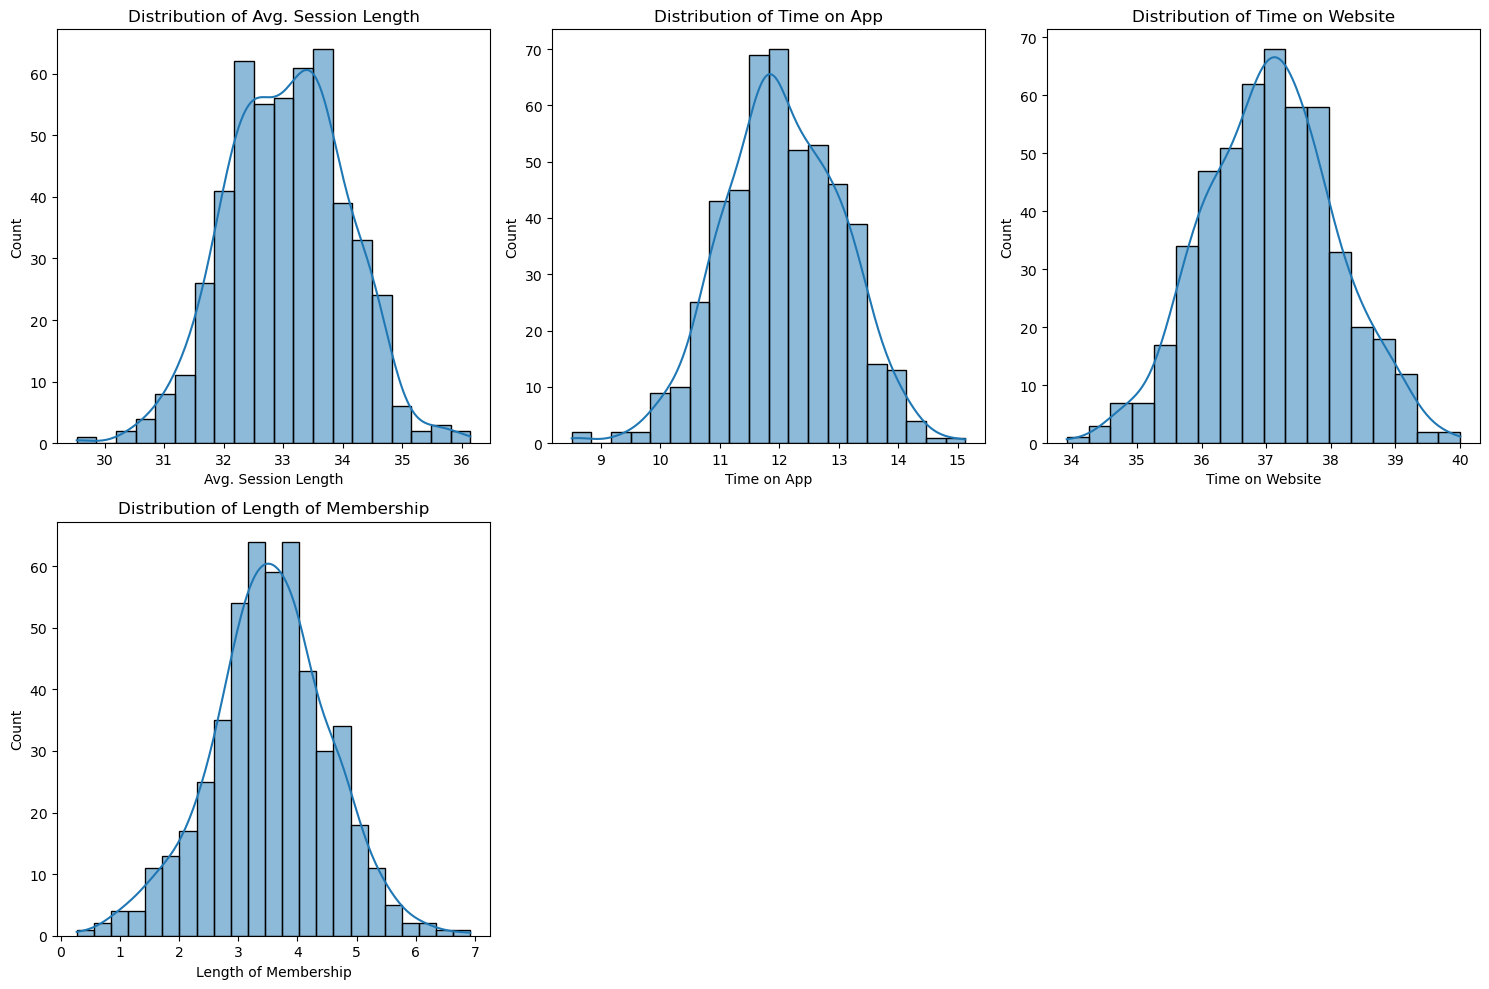

In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Bivariate Analysis

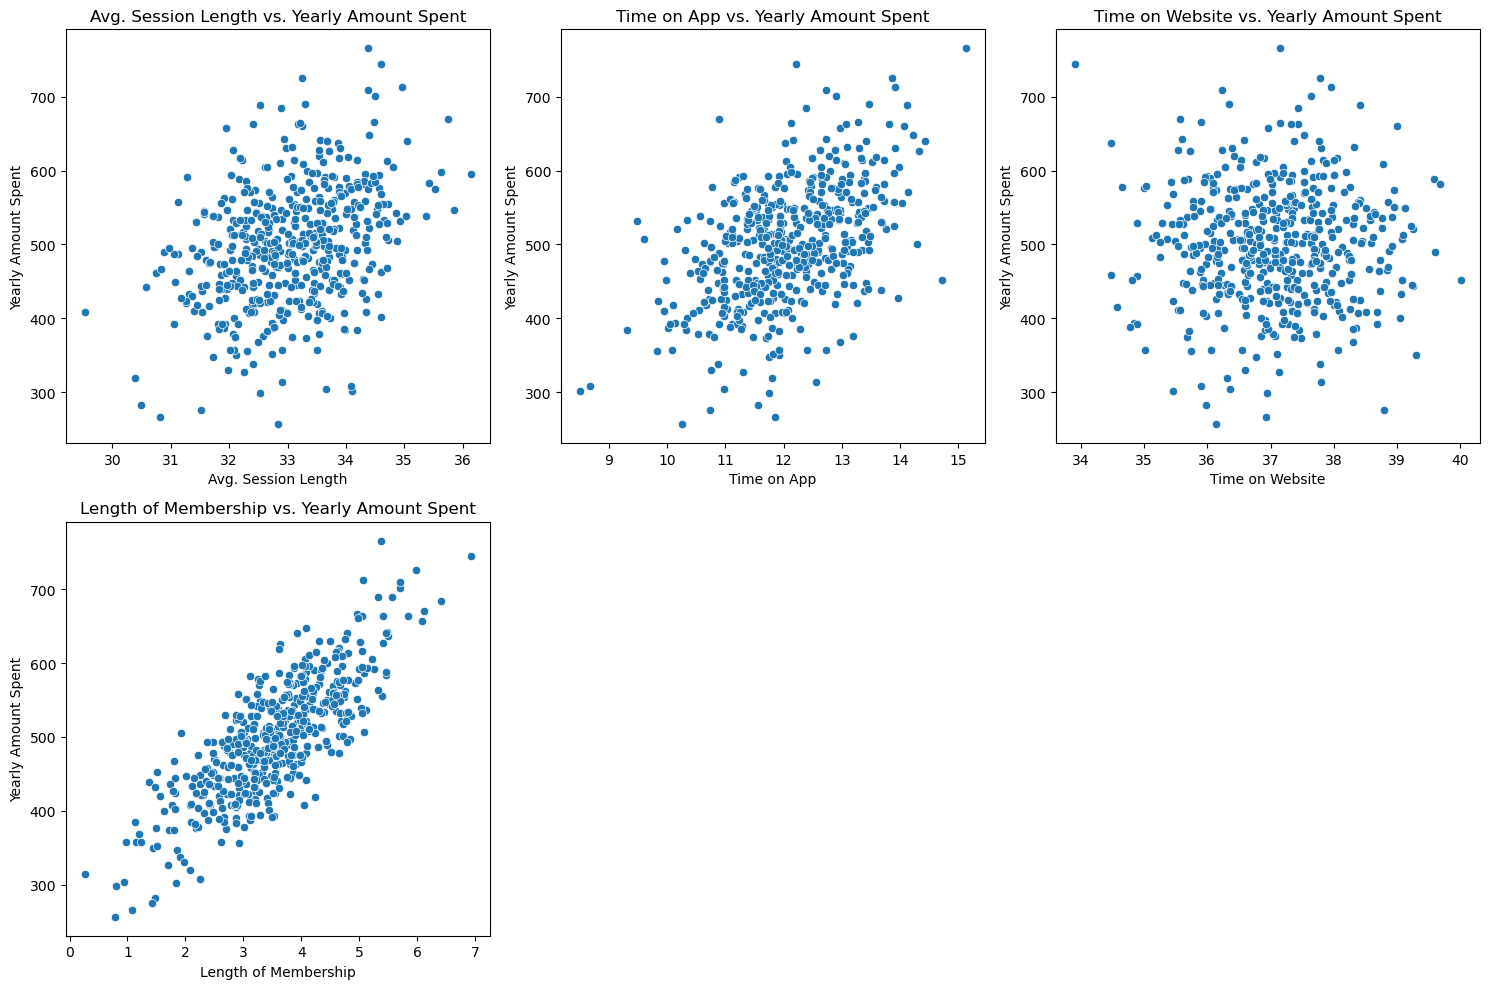

In [15]:
# Scatter plots for numerical features vs Yearly Amount Spent
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df, x=col, y='Yearly Amount Spent')
    plt.title(f'{col} vs. Yearly Amount Spent')
plt.tight_layout()
plt.show()

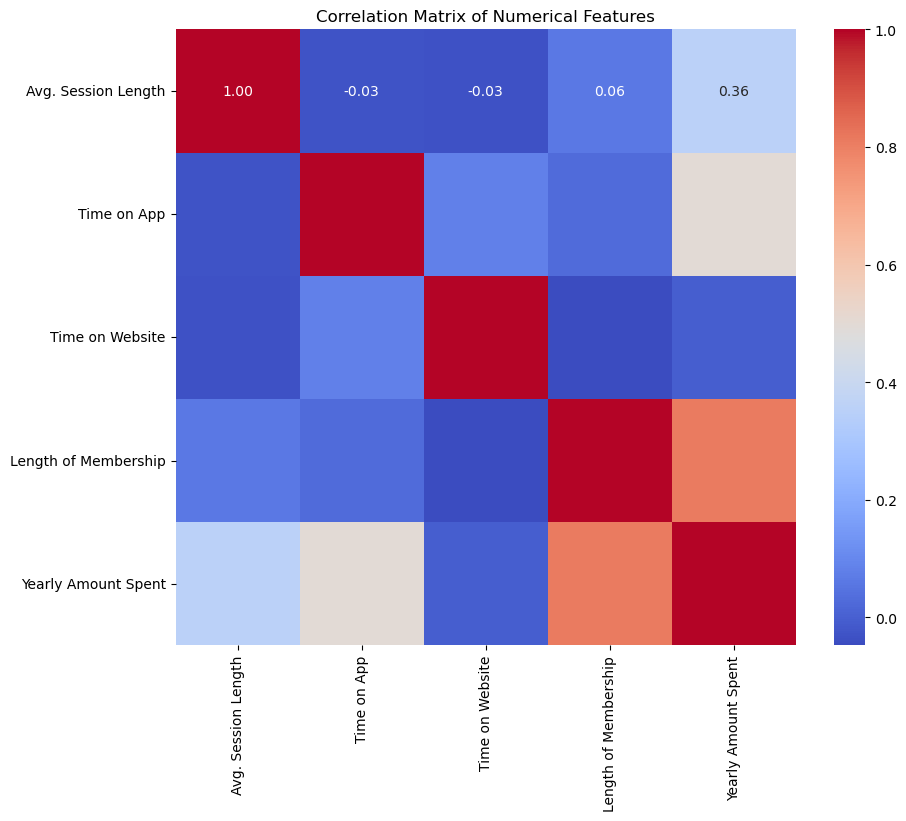

In [16]:
## Correlation Matrix (Numerical Features)
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features + ['Yearly Amount Spent']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

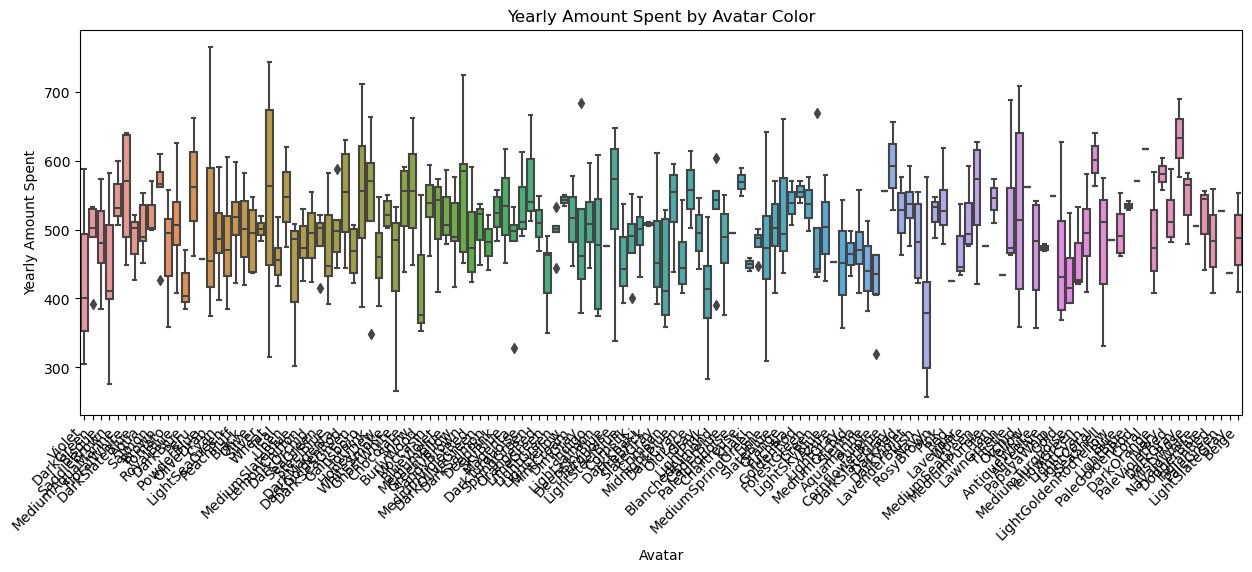

In [19]:
# Box plot Categorical Features vs. Yearly Amount Spent.
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='Avatar', y='Yearly Amount Spent')
plt.title('Yearly Amount Spent by Avatar Color')
plt.xticks(rotation=45, ha='right')
plt.show()

## Insights from the EDA
- 'Time on App' and 'Yearly Amount Spent' show very high correlation.
- 'Time on Website' on the other hand shows a weaker correlation.
- 'Length of membership' and 'Yearly Amount Spent' show a string correlation as well.
- Avatar does not seem to have any significant impact

# Feature Engineering

## Dropping Identifiers

In [21]:
# Dropping identifiers like (emails and addresses)
df_processed = df.drop(['Email', 'Address'], axis=1)
df_processed.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent'], dtype='object')

## Handling Missing Values

In [22]:
print("\nMissing values before imputation: ")
print(df_processed.isnull().sum())


Missing values before imputation: 
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


## Outlier Detection and Handling

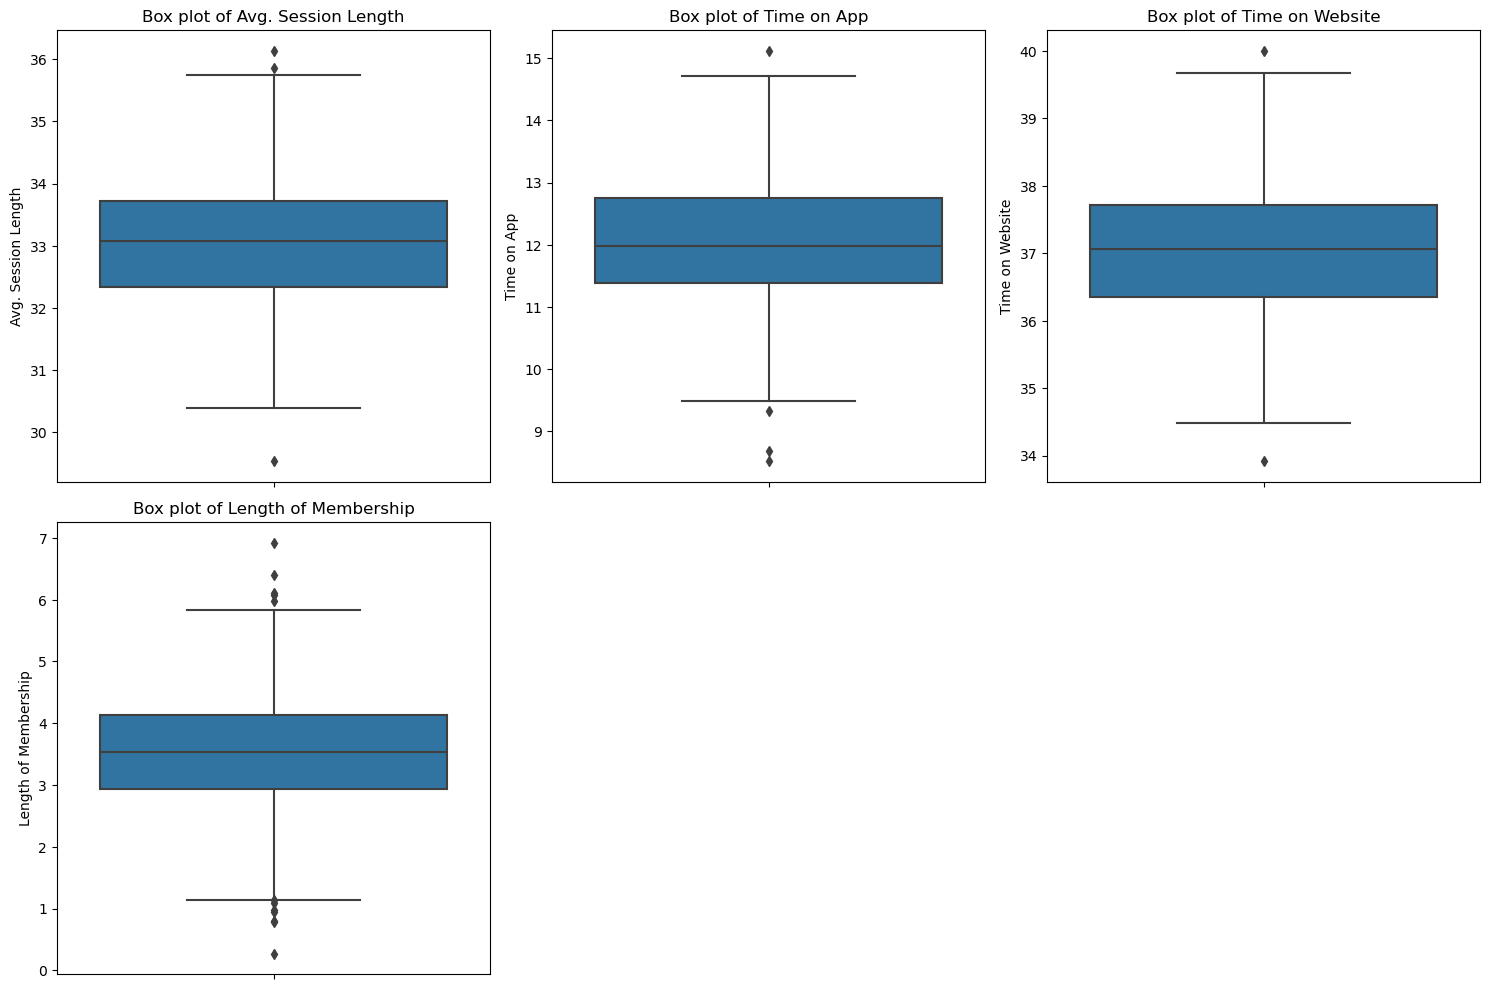

In [24]:
# Visualizing outliers using box plots.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_processed[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

- We'll rely on tree based models which are less sensitive to outliers

# Data Preprocessing for Machine Learning

In [25]:
X = df_processed.drop('Yearly Amount Spent', axis=1)
y = df_processed['Yearly Amount Spent']

In [26]:
# Identifying the numerical and categorical columns for the preprocessor.
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

## Creating the preprocessing piplelines

### Numerical pipeline

In [29]:
# we are going to impute with mean, then scale.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

### Categorical Pipeline

In [30]:
# we will impute the most frequent then one-hot encode.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Combining processers

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

In [32]:
## splitting the data to training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (400, 5)
Shape of X_test: (100, 5)
Shape of y_train: (400,)
Shape of y_test: (100,)


# Model Building and Training

## Defining the models

In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

In [34]:
results = {}

In [36]:
print("\nTraining and Evaluating the Models (before hyperparameter Tuning): ")
for name, model in models.items():
    print(f"\n----------Training {name}----------")
    # creating a full pipeline that includes preprocessing and model.
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                   ('regressor', model)])

    # Training the model.
    full_pipeline.fit(X_train, y_train)

    # Making the predictions.
    y_pred = full_pipeline.predict(X_test)

    # Evaluate the model.
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE':rmse, 'R2': r2}

    print(f"{name} Performance: ")
    print(f"  MAE: {mae:.2f}")
    print(f"  MAE: {mse:.2f}")
    print(f"  MAE: {rmse:.2f}")
    print(f"  MAE: {r2:.2f}")

print("\n--- Summary of Model Performances (before Hyperparameter Tuning) ---")
for name, metrics in results.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, RMSE={metrics['RMSE']:.2f}, R2={metrics['R2']:.2f}")



Training and Evaluating the Models (before hyperparameter Tuning): 

----------Training Linear Regression----------
Linear Regression Performance: 
  MAE: 9.73
  MAE: 143.86
  MAE: 11.99
  MAE: 0.97

----------Training Decision Tree Regressor----------
Decision Tree Regressor Performance: 
  MAE: 19.44
  MAE: 620.81
  MAE: 24.92
  MAE: 0.87

----------Training Random Forest Regressor----------
Random Forest Regressor Performance: 
  MAE: 14.06
  MAE: 342.56
  MAE: 18.51
  MAE: 0.93

----------Training Gradient Boosting Regressor----------
Gradient Boosting Regressor Performance: 
  MAE: 12.12
  MAE: 224.81
  MAE: 14.99
  MAE: 0.95

--- Summary of Model Performances (before Hyperparameter Tuning) ---
Linear Regression: MAE=9.73, RMSE=11.99, R2=0.97
Decision Tree Regressor: MAE=19.44, RMSE=24.92, R2=0.87
Random Forest Regressor: MAE=14.06, RMSE=18.51, R2=0.93
Gradient Boosting Regressor: MAE=12.12, RMSE=14.99, R2=0.95


# Hyperparameter tuning

In [38]:
# tuning the Random Forest and Gradient Boosting Regresssor.
param_grid_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Hyperparameter grid for Gradient Boosting Regressor
param_grid_gb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__min_samples_split': [2, 5, 10]
}


In [40]:
print("\n Hyperparameter Tuning")

tuned_models = {}

#Random Forest tuning.
print("\nTuning Random Forest Regressor...")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', RandomForestRegressor(random_state=42))])

grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
tuned_models['Random Forest Regressor (Tuned)'] = best_rf_model

y_pred_rf_tuned = best_rf_model.predict(X_test)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Random Forest Regressor (Tuned) Performance:")
print(f"  MAE: {mae_rf_tuned:.2f}")
print(f"  RMSE: {rmse_rf_tuned:.2f}")
print(f"  R2: {r2_rf_tuned:.2f}")


 Hyperparameter Tuning

Tuning Random Forest Regressor...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for Random Forest: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Random Forest Regressor (Tuned) Performance:
  MAE: 20.89
  RMSE: 27.53
  R2: 0.85


In [41]:
# Gradient Boosting Tuning
print("\nTuning Gradient Boosting Regressor...")
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor(random_state=42))])

grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_gb.fit(X_train, y_train)

best_gb_model = grid_search_gb.best_estimator_
tuned_models['Gradient Boosting Regressor (Tuned)'] = best_gb_model

y_pred_gb_tuned = best_gb_model.predict(X_test)
mae_gb_tuned = mean_absolute_error(y_test, y_pred_gb_tuned)
rmse_gb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_gb_tuned))
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Gradient Boosting Regressor (Tuned) Performance:")
print(f"  MAE: {mae_gb_tuned:.2f}")
print(f"  RMSE: {rmse_gb_tuned:.2f}")
print(f"  R2: {r2_gb_tuned:.2f}")


Tuning Gradient Boosting Regressor...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Gradient Boosting: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 300, 'regressor__subsample': 0.8}
Gradient Boosting Regressor (Tuned) Performance:
  MAE: 11.25
  RMSE: 13.97
  R2: 0.96


In [42]:
# Comparing tuned models with initial models.

results['Random Forest Regressor (Tuned)'] = {'MAE': mae_rf_tuned, 'MSE': rmse_rf_tuned**2, 'RMSE': rmse_rf_tuned, 'R2': r2_rf_tuned}
results['Gradient Boosting Regressor (Tuned)'] = {'MAE': mae_gb_tuned, 'MSE': rmse_gb_tuned**2, 'RMSE': rmse_gb_tuned, 'R2': r2_gb_tuned}

print("\n--- Summary of All Model Performances (including Tuned) ---")
for name, metrics in results.items():
    print(f"{name}: MAE={metrics['MAE']:.2f}, RMSE={metrics['RMSE']:.2f}, R2={metrics['R2']:.2f}")



--- Summary of All Model Performances (including Tuned) ---
Linear Regression: MAE=9.73, RMSE=11.99, R2=0.97
Decision Tree Regressor: MAE=19.44, RMSE=24.92, R2=0.87
Random Forest Regressor: MAE=14.06, RMSE=18.51, R2=0.93
Gradient Boosting Regressor: MAE=12.12, RMSE=14.99, R2=0.95
Random Forest Regressor (Tuned): MAE=20.89, RMSE=27.53, R2=0.85
Gradient Boosting Regressor (Tuned): MAE=11.25, RMSE=13.97, R2=0.96


# Feature Importance

In [43]:
# Getting from the best performing tree-based model.

# Getting feature names from the preprocessor.
ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list (ohe_feature_names)

# Access the regressor from the best pipeline
if 'regressor' in best_gb_model.named_steps:
    feature_importances = best_gb_model.named_steps['regressor'].feature_importances_
else: # If the best model itself is the regressor without an explicit 'regressor' step
    feature_importances = best_gb_model.feature_importances_


--- Feature Importances from Tuned Gradient Boosting Regressor ---
                   Feature  Importance
3     Length of Membership    0.665720
1              Time on App    0.236039
0      Avg. Session Length    0.092731
2          Time on Website    0.001666
73     Avatar_LightSkyBlue    0.000254
..                     ...         ...
21         Avatar_Cornsilk    0.000000
20   Avatar_CornflowerBlue    0.000000
101   Avatar_PaleGoldenRod    0.000000
102       Avatar_PaleGreen    0.000000
68        Avatar_LightGray    0.000000

[137 rows x 2 columns]


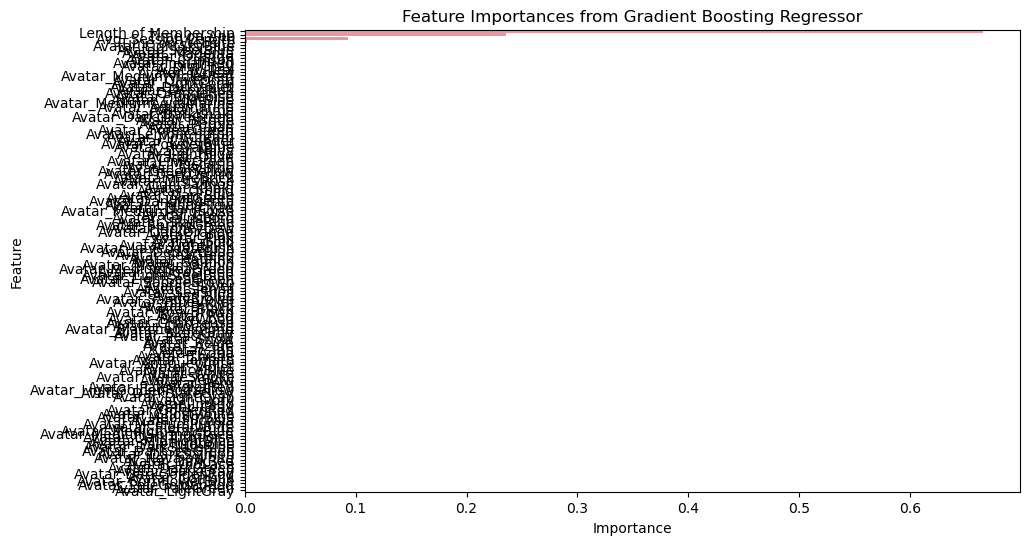

In [44]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importances from Tuned Gradient Boosting Regressor ---")
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.show()

In [45]:
print("\n--- Conclusion and Recommendations ---")

# Analyze feature importances to address the problem statement
time_on_app_importance = importance_df[importance_df['Feature'].str.contains('Time on App')]['Importance'].sum()
time_on_website_importance = importance_df[importance_df['Feature'].str.contains('Time on Website')]['Importance'].sum()

print(f"\nImportance of 'Time on App': {time_on_app_importance:.4f}")
print(f"Importance of 'Time on Website': {time_on_website_importance:.4f}")

# Based on the feature importances (and potentially correlations from EDA):
if time_on_app_importance > time_on_website_importance:
    print("\nRecommendation: Based on the analysis, 'Time on App' has a significantly higher impact on 'Yearly Amount Spent' compared to 'Time on Website'.")
    print("Therefore, the company should focus its efforts on enhancing the mobile app experience.")
    print("Key areas for improvement could include:")
    print("  - Optimizing app performance and user interface.")
    print("  - Implementing new features that encourage more time spent on the app.")
    print("  - Personalization within the app to drive engagement.")
    print("  - Targeted marketing campaigns for app users.")
elif time_on_website_importance > time_on_app_importance:
    print("\nRecommendation: Based on the analysis, 'Time on Website' has a significantly higher impact on 'Yearly Amount Spent' compared to 'Time on App'.")
    print("Therefore, the company should focus its efforts on enhancing the website experience.")
    print("Key areas for improvement could include:")
    print("  - Improving website navigation and design.")
    print("  - Enhancing responsiveness and loading times.")
    print("  - Optimizing product display and checkout process.")
    print("  - SEO and content marketing for website traffic.")
else:
    print("\nRecommendation: 'Time on App' and 'Time on Website' have similar importance in predicting 'Yearly Amount Spent'.")
    print("This suggests that both platforms contribute significantly to customer spending.")
    print("The company should consider a balanced approach, investing in improvements for both the mobile app and the website.")
    print("Further investigation into customer segments or specific features within each platform might yield more granular insights.")

print("\nAdditional Insights:")
print(f"- 'Length of Membership' and 'Avg. Session Length' are also likely strong predictors, indicating the value of long-term customers and in-store engagement.")
print("- The chosen model (e.g., Tuned Gradient Boosting Regressor) provides a good fit to the data (high R2, low MAE/RMSE), indicating reliable predictions.")
print("- Future work could involve segmenting customers or A/B testing different features on both platforms.")


--- Conclusion and Recommendations ---

Importance of 'Time on App': 0.2360
Importance of 'Time on Website': 0.0017

Recommendation: Based on the analysis, 'Time on App' has a significantly higher impact on 'Yearly Amount Spent' compared to 'Time on Website'.
Therefore, the company should focus its efforts on enhancing the mobile app experience.
Key areas for improvement could include:
  - Optimizing app performance and user interface.
  - Implementing new features that encourage more time spent on the app.
  - Personalization within the app to drive engagement.
  - Targeted marketing campaigns for app users.

Additional Insights:
- 'Length of Membership' and 'Avg. Session Length' are also likely strong predictors, indicating the value of long-term customers and in-store engagement.
- The chosen model (e.g., Tuned Gradient Boosting Regressor) provides a good fit to the data (high R2, low MAE/RMSE), indicating reliable predictions.
- Future work could involve segmenting customers or A/